## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries and generate synthetic data

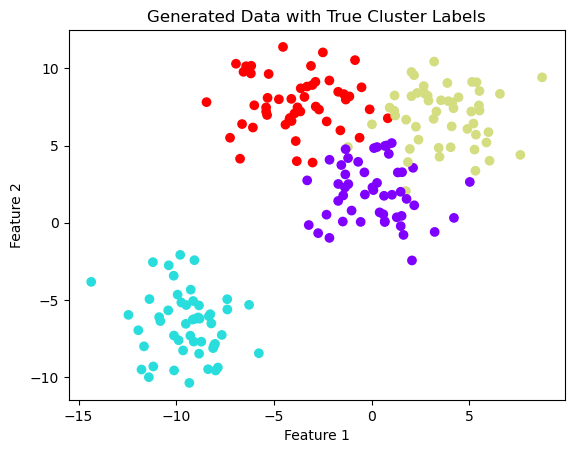

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
data, cluster_labels = make_blobs(
    n_samples=200,    # Total number of samples
    n_features=2,     # Number of features (dimensions)
    centers=4,        # Number of clusters
    cluster_std=1.8,  # Standard deviation of clusters
    random_state=101  # Ensures reproducibility
)

# Visualize the data
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap="rainbow")
plt.title("Generated Data with True Cluster Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Creating the Clusters

In [6]:
from sklearn.cluster import KMeans

# Initialize the K-Means model
kmeans = KMeans(n_clusters=4, random_state=101)

# Fit the model to the data
kmeans.fit(data)

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=101)

In [7]:
# Get the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[-0.03183854  2.07689723]
 [-4.13591321  7.95389851]
 [ 3.66465568  6.97762652]
 [-9.46941837 -6.56081545]]


In [8]:
# Get the cluster labels
cluster_labels = kmeans.labels_
print("Cluster Labels:\n", cluster_labels)

Cluster Labels:
 [1 2 0 2 2 3 2 0 2 0 1 0 2 2 1 0 2 0 3 1 3 0 0 3 1 3 3 0 2 2 1 3 2 0 0 1 3
 3 3 0 3 1 1 1 0 2 1 0 3 0 0 1 2 0 3 1 0 0 1 2 3 2 3 1 2 0 3 2 2 3 2 0 3 0
 3 2 2 0 1 0 0 3 2 3 0 0 0 1 0 3 3 3 3 0 0 3 2 1 3 2 0 3 0 0 2 0 3 2 3 3 2
 1 1 2 3 2 1 1 2 1 2 1 0 1 0 2 1 0 3 1 1 1 0 3 3 1 2 1 2 0 3 2 3 1 1 2 0 3
 1 1 1 1 0 2 0 1 2 2 2 0 2 0 0 1 3 1 0 2 1 0 2 0 1 2 0 1 2 2 3 2 1 3 3 1 3
 3 3 3 3 0 3 2 2 1 3 0 2 2 3 0]


In [55]:
kmeans.labels_

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 3,
       2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3,
       0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0, 3, 2, 2, 3, 0,
       3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 3, 2,
       3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3, 1, 2, 3, 3, 3, 1, 3,
       1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 3, 0, 3, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3, 0, 1], dtype=int32)

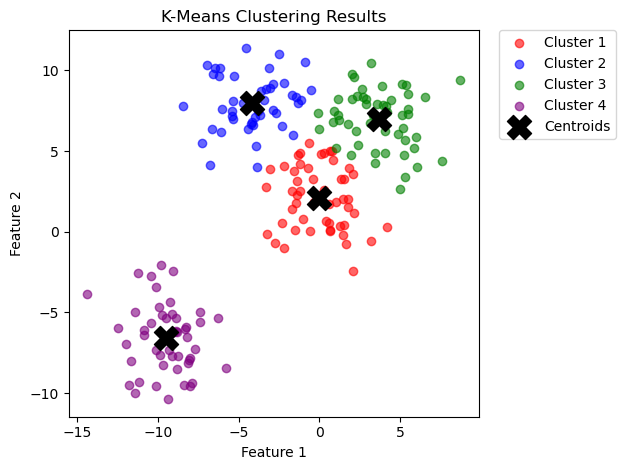

In [19]:
import matplotlib.pyplot as plt

# Create a color map for clusters
colors = ['red', 'blue', 'green', 'purple']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Plot each cluster with a unique color and label
for i in range(4):
    plt.scatter(data[cluster_labels == i, 0], data[cluster_labels == i, 1],
                c=colors[i], label=cluster_names[i], alpha=0.6)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c="black", marker="X", label="Centroids")

# Add titles and labels
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Position the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Comparing Predicted Clusters with True Labels

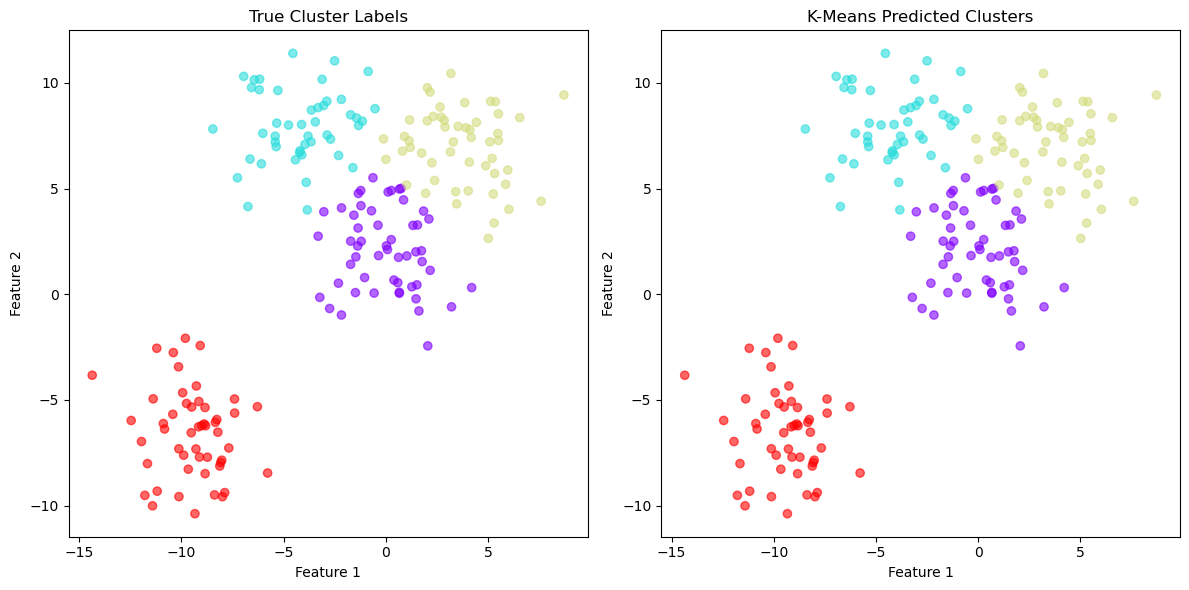

In [25]:
# Plot the true labels for comparison
plt.figure(figsize=(12, 6))

# Original labels
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap="rainbow", alpha=0.6)
plt.title("True Cluster Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap="rainbow", alpha=0.6)
plt.title("K-Means Predicted Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

## Exploring Different Numbers of Clusters

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


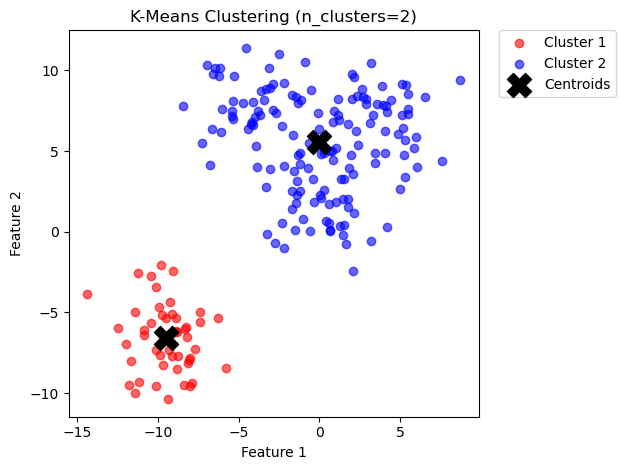

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


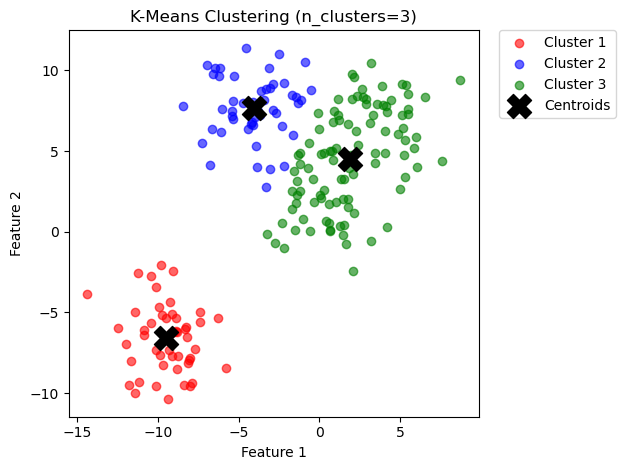

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


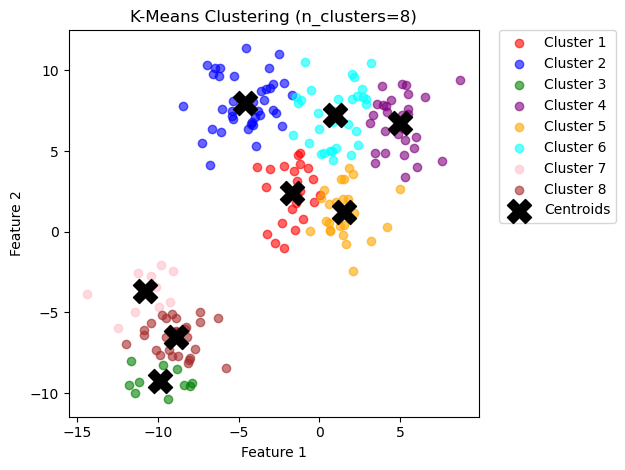

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to visualize clustering with varying number of clusters
def plot_kmeans(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=101)
    kmeans.fit(data)

    # Create colors and labels for the clusters
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'pink', 'brown']
    cluster_names = [f"Cluster {i+1}" for i in range(n_clusters)]

    # Plot each cluster with its own color and label
    for i in range(n_clusters):
        plt.scatter(data[kmeans.labels_ == i, 0], data[kmeans.labels_ == i, 1],
                    c=colors[i], label=cluster_names[i], alpha=0.6)

    # Plot the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c="black", marker="X", label="Centroids")

    # Add title and labels
    plt.title(f"K-Means Clustering (n_clusters={n_clusters})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Position the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

# Test different numbers of clusters
for n in [2, 3, 8]:
    plot_kmeans(n, data)